In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from PIL import Image

## Question 1

#### Load Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

## Question 2

#### Plot numbers
Για να μην ψάξω ένας προς ένας που είναι το κάθε ψηφίο και κάνω 10 plots το ένα κάτω από το άλλο, βρήκα τις θέσεις των unique και έκανα ένα συνολικό plot.

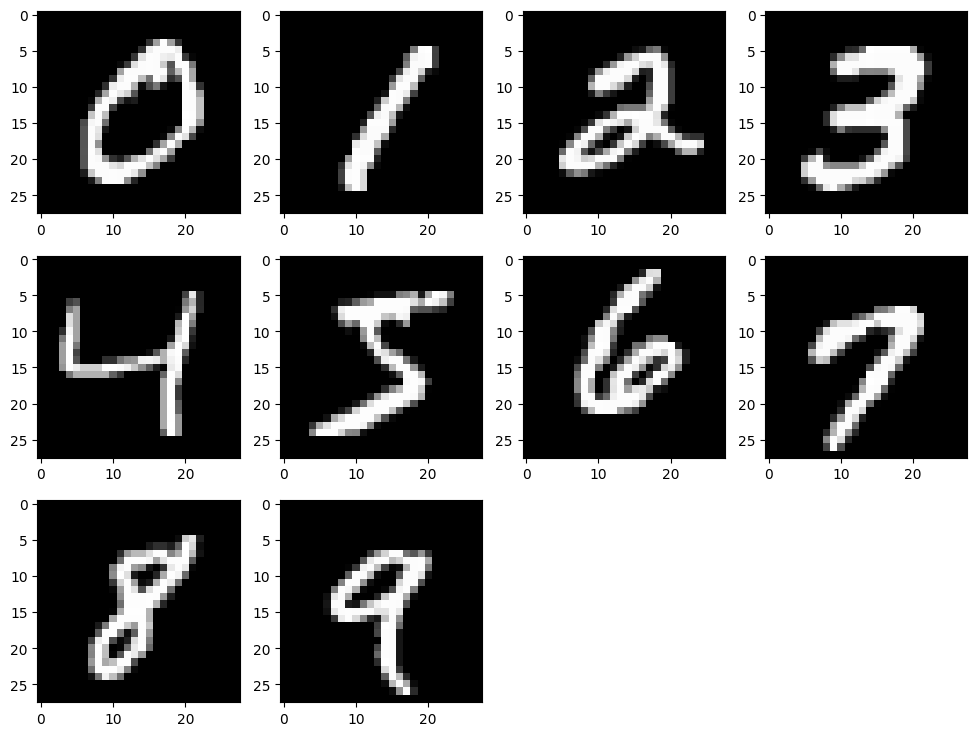

In [3]:
unique_idxs = np.unique(y_train, return_index=True)
#Pairnw to deutero array apo to unique_idxs, giati auto periexei tis thesis tou kathe arithmou
numbers = x_train[unique_idxs[1]]

figure, axes = plt.subplots(3,4,figsize=(12,9))
axes=axes.flatten()
for i,num in enumerate(numbers): 
    axes[i].imshow(num, cmap='gray')
figure.delaxes(axes[10]) #Diagrafw ta 2 teleutaia subplots gia na min fainontai kena
figure.delaxes(axes[11])
plt.show()

## Question 3

Και από το x_train.shape->(60000, 28, 28) που τρέξαμε παραπάνω, και από το plot που δημιουργήσαμε, παρατηρούμε ότι η κάθε εικόνα είναι μεγέθους 28x28 pixels.

Εφόσον εκπαιδεύουμε έναν KNN ταξινομητή, είναι εξίσου σημαντικά όλα τα pixel της εικόνας διότι υπολογίζεται η απόσταση όλων των pixel κατά την διάρκεια της ταξινόμησης. Οπότε, οποιοσδήποτε θόρυβος/αλλαγή pixel στην εικόνα μπορεί να επηρεάσει σημαντικά την πρόβλεψη του μοντέλου.

## Question 4

Τα y_train και y_test arrays είναι ήδη διανύσματα (60000,1)/(10000,1), οπότε χρειάζεται να κάνουμε διανύσματα μόνο τα x_train και x_test arrays.

In [4]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [5]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

x_train.shape, x_test.shape

((60000, 784), (10000, 784))

## Question 5

In [6]:
train_accuracies = []
test_accuracies = []
k_values = [5,15,51,round(sqrt(len(x_train)))]
for k in k_values:
    print(f"Training {k}-Nearest Neighbors Classifier")
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train, y_train)
    
    ypred_train = knn_model.predict(x_train)
    train_accuracy = round(accuracy_score(y_train, ypred_train)*100,2)
    train_accuracies.append(train_accuracy)
    print(f"{k}-Nearest Neighbors Classifier accuracy in training set: {train_accuracy}")

    ypred_test = knn_model.predict(x_test)
    test_accuracy = round(accuracy_score(y_test, ypred_test)*100,2)
    test_accuracies.append(test_accuracy)
    print(f"{k}-Nearest Neighbors Classifier accuracy in test set: {test_accuracy}\n")


print(f"All accuracies in training set: {train_accuracies}")
print(f"All accuracies in test set: {test_accuracies}")

Training 5-Nearest Neighbors Classifier
5-Nearest Neighbors Classifier accuracy in training set: 98.19
5-Nearest Neighbors Classifier accuracy in test set: 96.88

Training 15-Nearest Neighbors Classifier
15-Nearest Neighbors Classifier accuracy in training set: 97.1
15-Nearest Neighbors Classifier accuracy in test set: 96.33

Training 51-Nearest Neighbors Classifier
51-Nearest Neighbors Classifier accuracy in training set: 95.32
51-Nearest Neighbors Classifier accuracy in test set: 95.33

Training 245-Nearest Neighbors Classifier
245-Nearest Neighbors Classifier accuracy in training set: 92.09
245-Nearest Neighbors Classifier accuracy in test set: 92.38

All accuracies in training set: [98.19, 97.1, 95.32, 92.09]
All accuracies in test set: [96.88, 96.33, 95.33, 92.38]


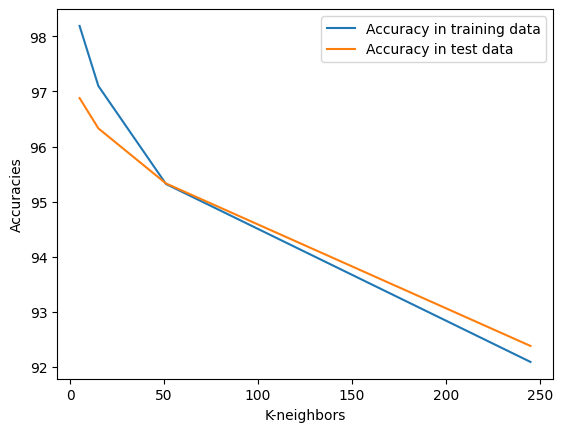

In [7]:
plt.plot(k_values,train_accuracies)
plt.plot(k_values, test_accuracies)
plt.xlabel("K-neighbors")
plt.ylabel("Accuracies")
plt.legend(["Accuracy in training data", "Accuracy in test data"])
plt.show()

Παρατηρούμε ότι όσο αυξάνεται η τιμή του k, μειώνεται η απόδοση του μοντέλου, διότι μειώνεται η πολυπλοκότητά του.

## Question 6

In [8]:
x_train_norm = x_train/255
x_test_norm = x_test/255

In [9]:
train_accuracies_norm = []
test_accuracies_norm = []
k_values = [5,15,51,round(sqrt(len(x_train)))]
for k in k_values:
    print(f"Training {k}-Nearest Neighbors Classifier")
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train_norm, y_train)
    
    ypred_train = knn_model.predict(x_train_norm)
    train_accuracy_norm = round(accuracy_score(y_train, ypred_train)*100,2)
    train_accuracies_norm.append(train_accuracy_norm)
    print(f"{k}-Nearest Neighbors Classifier accuracy in normalized training set: {train_accuracy_norm}")

    ypred_test = knn_model.predict(x_test_norm)
    test_accuracy_norm = round(accuracy_score(y_test, ypred_test)*100,2)
    test_accuracies_norm.append(test_accuracy_norm)
    print(f"{k}-Nearest Neighbors Classifier accuracy in normalized test set: {test_accuracy_norm}\n")

print(f"All accuracies in normalized training set: {train_accuracies_norm}")
print(f"All accuracies in normalized test set: {test_accuracies_norm}")

Training 5-Nearest Neighbors Classifier
5-Nearest Neighbors Classifier accuracy in normalized training set: 98.19
5-Nearest Neighbors Classifier accuracy in normalized test set: 96.88

Training 15-Nearest Neighbors Classifier
15-Nearest Neighbors Classifier accuracy in normalized training set: 97.1
15-Nearest Neighbors Classifier accuracy in normalized test set: 96.33

Training 51-Nearest Neighbors Classifier
51-Nearest Neighbors Classifier accuracy in normalized training set: 95.32
51-Nearest Neighbors Classifier accuracy in normalized test set: 95.33

Training 245-Nearest Neighbors Classifier
245-Nearest Neighbors Classifier accuracy in normalized training set: 92.09
245-Nearest Neighbors Classifier accuracy in normalized test set: 92.38

All accuracies in normalized training set: [98.19, 97.1, 95.32, 92.09]
All accuracies in normalized test set: [96.88, 96.33, 95.33, 92.38]


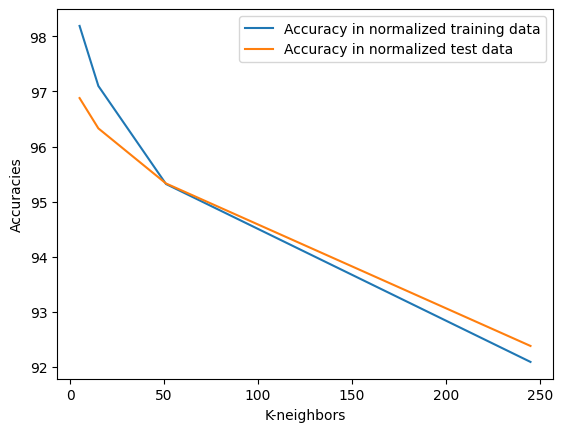

In [10]:
plt.plot(k_values,train_accuracies_norm)
plt.plot(k_values, test_accuracies_norm)
plt.xlabel("K-neighbors")
plt.ylabel("Accuracies")
plt.legend(["Accuracy in normalized training data", "Accuracy in normalized test data"])
plt.show()

Παρατηρούμε ότι ακόμα και μετά την κανονικοποίηση, η ακρίβεια παραένει ίδια για οποιαδήποτε τιμή του k.

## Question 7

In [11]:
test7 = plt.imread('./test7.png')
test7_withError = plt.imread('./test7_withError.png')
test5 = plt.imread('./test5_incorner.png')

test7.shape, test7_withError.shape, test5.shape

((28, 28, 4), (28, 28, 4), (28, 28, 4))

In [12]:
test7=test7[:,:,0]
test7_withError=test7_withError[:,:,0]
test5=test5[:,:,0]

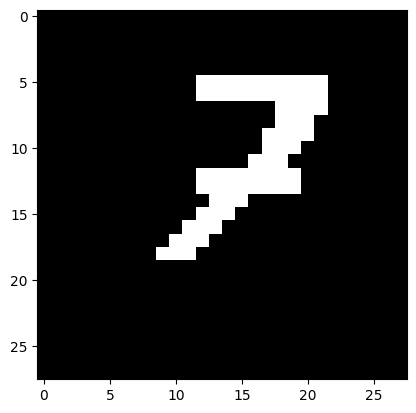

In [13]:
plt.imshow(test7, cmap='gray')

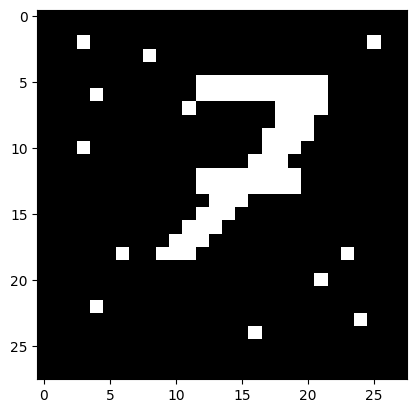

In [14]:
plt.imshow(test7_withError, cmap='gray')

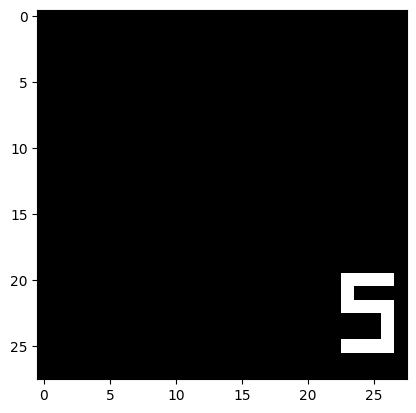

In [15]:
plt.imshow(test5, cmap='gray')

In [16]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train_norm, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [17]:
flatten7 = test7.flatten().reshape(1,784)
flatten7_withError = test7_withError.flatten().reshape(1,784)
flatten5 = test5.flatten().reshape(1,784)

flatten7.shape, flatten7_withError.shape, flatten5.shape

((1, 784), (1, 784), (1, 784))

In [18]:
predicted_num = knn_model.predict(flatten7)
print(predicted_num[0])

1


In [19]:
predicted_num = knn_model.predict(flatten5)
print(predicted_num[0])

1


In [20]:
predicted_num = knn_model.predict(flatten7_withError)
print(predicted_num[0])

1
